In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in the avocado.csv dataset

avocado = pd.read_csv(
    r'C:\Users\Adam\avocado.csv',
    index_col = 0,
)
avocado.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10,2017-10-22,1.80,168429.18,2401.85,39858.54,607.05,125561.74,115932.33,9629.41,0.00,organic,2017,Midsouth
18,2017-08-27,1.79,356447.96,143124.90,120383.98,19739.14,73199.94,67689.01,4535.81,975.12,conventional,2017,SanDiego
49,2015-01-18,1.64,1426.87,91.85,137.49,0.00,1197.53,1197.53,0.00,0.00,organic,2015,BuffaloRochester
39,2016-03-27,1.33,3982.06,1196.76,7.73,0.00,2777.57,2777.57,0.00,0.00,organic,2016,MiamiFtLauderdale
47,2016-01-31,1.54,1844.79,804.36,0.00,0.00,1040.43,1040.43,0.00,0.00,organic,2016,MiamiFtLauderdale


In [3]:
sns.set()

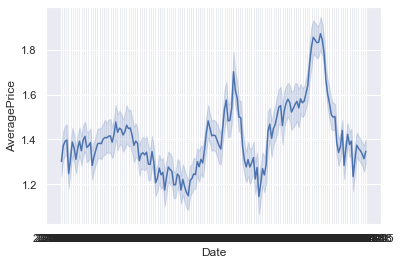

In [4]:
# Create a line plot showing the average
# price of avocado over months

sns.lineplot(
    x='Date',
    y='AveragePrice',
    data=avocado,
)

Text(0.5, 0, 'Mean prices')

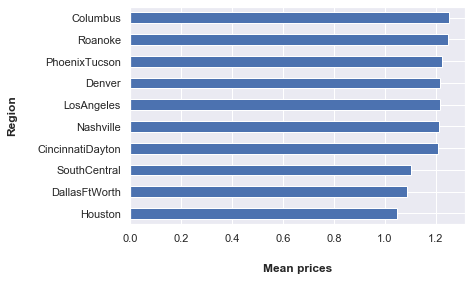

In [5]:
# Create a horizontal bar plot showing
# 10 highest mean prices depending on region

from matplotlib.ticker import StrMethodFormatter

ax = avocado.groupby('region').AveragePrice.mean().sort_values().head(10).plot(kind = 'barh')
ax.set_ylabel('Region', labelpad=20, weight='bold', size=12)
ax.set_xlabel('Mean prices', labelpad=20, weight='bold', size=12)

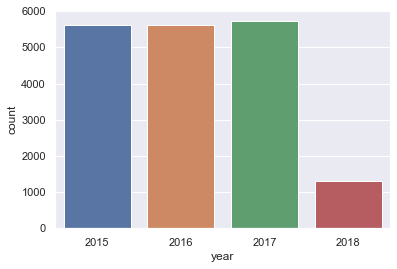

In [6]:
# Create a count plot for the year of the avocado

sns.countplot(
    'year',
    data=avocado,
)

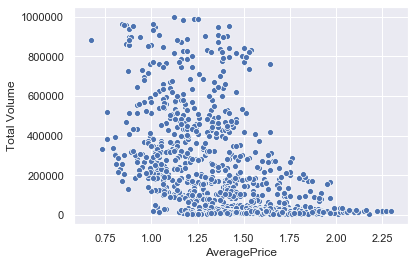

In [7]:
# Create a scatter plot of average price
# vs Total Volume for year 2018, 
# when the Total Volume is lower than 1e6


prep = avocado.loc[((avocado.year == 2018) & (avocado['Total Volume'] < 1000000))]

sns.scatterplot(
    x = 'AveragePrice',
    y = 'Total Volume',
    data=prep,
)

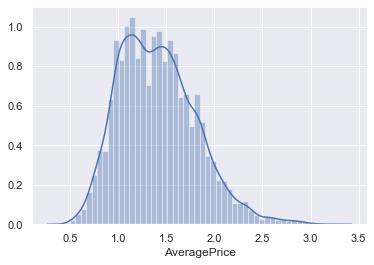

In [8]:
# Show the AveragePrice distribution.

sns.distplot(avocado['AveragePrice'])

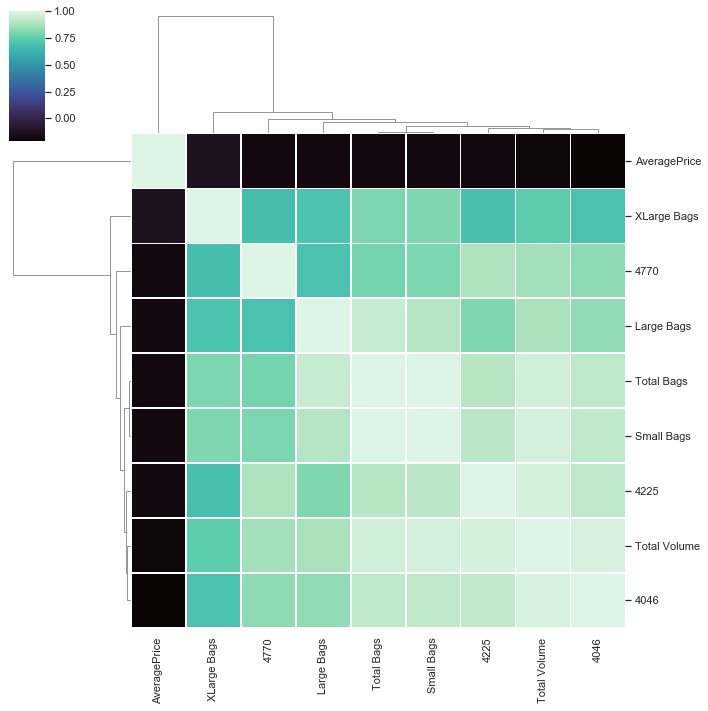

In [9]:
# Create a clustermap of avocado correlations.

cr = ['AveragePrice', 'Total Volume', '4046',
         '4225', '4770', 'Total Bags', 'Small Bags',
         'Large Bags', 'XLarge Bags']
sns.clustermap(
    avocado[cr].corr(),
    cmap="mako",
    linewidths=.75,
)

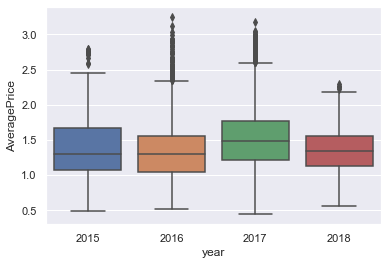

In [10]:
# Show a boxplot of average price per year.

sns.boxplot(
    x='year',
    y='AveragePrice',
    data=avocado,
)